# Exercise 5.4: The diffraction limit of a telescope

Our ability to resolve detail in astronomical observations is limited by the diffraction of light in our teselscopes. Light from stars can be treated as effectively as coming from a point source at infinity. When such light, with wavelength $\lambda$, passes through the circular aperture of a telescope (which we'll assume to have unit radius) and is focused by the telescope in the focal plane, it produces not a single dot, but a circular diffraction pattern consisting of central spot surrounded by a series of concentric rings. The intensity of the light in this diffraction pattern is given by 

$$ I(r) = \bigg(\frac{J_1(kr)}{kr}\bigg)^2,$$ 

where $r$ is the distance in the focal plane from the center of the diffraction pattern, $k=2\pi/\lambda$, and $J_1(x)$ is a Bessel function. The Bessel functions $J_m(x)$ are given by

$$ J_m(x) = \frac{1}{\pi} \int^\pi_0\cos(m\theta - x\sin\theta)\text{d}\theta,$$

where $m$ is a nonegative integer and $x\geq0$.

a) Write a Python function $J(m,x)$ that calculates the value of $J_m(x)$ using Simpson's Rule with N=1000 points. Use your function in a program to make aplot, on a single graph, of the Bessel functions $J_0$, $J_1$, $J_2$ as a function of $x$ from $x=0$ to $x=20$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def simpson(f, m, x, start, end, N):
    '''
    Calculates the integrand for bessel function f from start to end with N slices
    parameters:
    f - The function to be integrated
    m - int index number for the bessel function
    x - float the x value
    start - float the start point
    end - float the end point
    N - the number of slices
    I - float the integrand
    '''
    
    h = (end-start)/N
    fa = f(m, x,start)
    fb = f(m, x, end)
    
    # sum the even and odd parts
    even, odd = 0, 0
    for i in range(1, N):
        if i%2==0:
            even +=f(m, x,start+i*h)
        else:
            odd += f(m, x,start+i*h)
    
    return (1/3)*h*(fa+fb+4*odd+2*even)

In [21]:
def bessel(m, x):
    '''
    Calculates the Bessel function as a function of m and x
    parameters:
    m - int the index number of the bessel function
    x - float x 
    '''
    
    weight = 1/np.pi
    
    def f(m, x, theta):
        return np.cos(m*theta - x*np.sin(theta))
    
    I = weight*simpson(f, m, x, 0, np.pi, N)
    return I
    

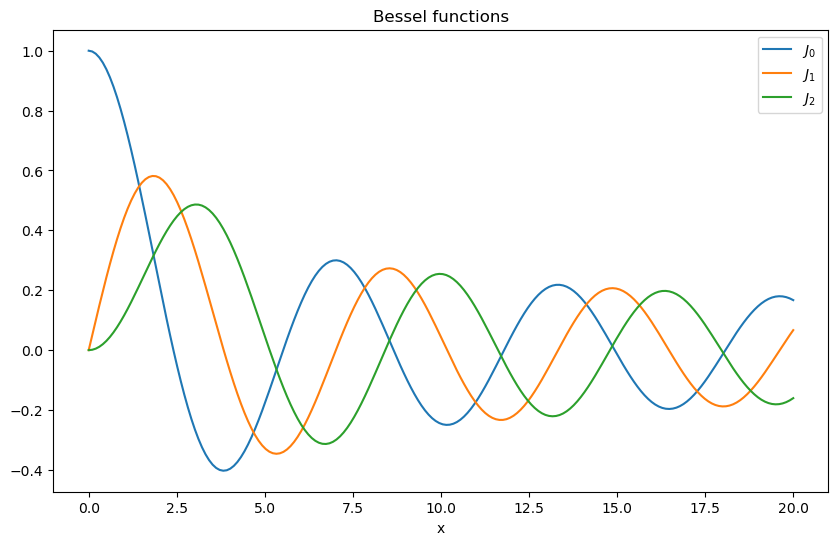

In [23]:
J_0, J_1, J_2 = [], [], []
J = [J_0, J_1, J_2]
xs = np.linspace(0, 20, 200)
ms = [i for i in  range(3)]
N = 1000


for m in ms:
    for x in xs:
        J[m].append(bessel(m, x))

plt.figure(figsize=(10,6))
plt.title("Bessel functions")
plt.xlabel("x")
for i in range(3):
    plt.plot(xs, J[i], label=f"$J_{i}$")
plt.legend()
plt.show()


b) Make a second program that makes a density plot of the intensity of the circular diffractin pattern of a point light source with $\lambda=500\text{nm}$, in a square region of the focal plane, using the formula given above. Your Picture should cover values of $r$ from zero up to about $1\mu m$

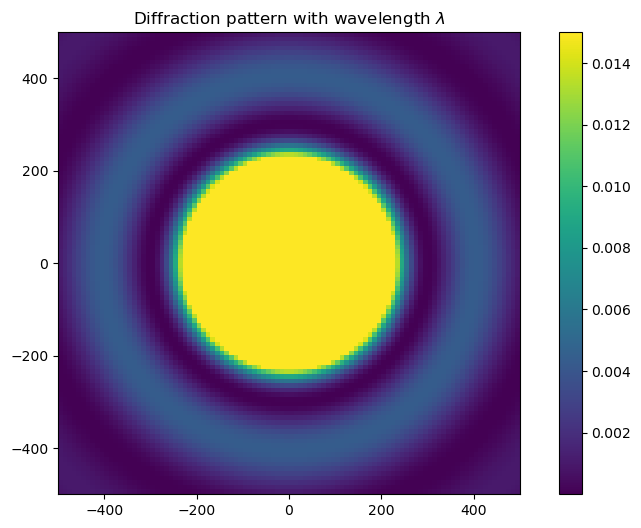

In [47]:
N = 1000
m = 1
l = 500e-9
xs = ys = np.linspace(-5e-7, 5e-7, 100)
#x, y = np.meshgrid(x, y)
diffraction = np.zeros((100,100))

for i, x in enumerate(xs):
    for j, y in enumerate(ys):
        r = np.sqrt(x**2+y**2)
        k = 2*np.pi/l
        diffraction[i,j] = (bessel(m, k*r)/(k*r))**2

plt.figure(figsize=(10,6))
plt.title("Diffraction pattern with wavelength $\lambda$")
plt.imshow(diffraction, origin="lower", vmax=0.015, extent=(-500, 500, -500, 500))
plt.set_cmap("viridis")
plt.colorbar()
plt.show()
